<a href="https://colab.research.google.com/github/pankajan05/SE_2016_032/blob/main/Percipitation_Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/content/weather.xlsx')

In [ ]:
df.head()

,Time,Temperature,Atmospheric_pressure,Atmospheric_pressure_sea,Pa,Relative_humidity,wind_direction,Wind_speed(m/s),Total Cloud Coverage,Present_weather,Cloud,Cloud_present,horizontal visibility (km),Precipitation(millimeters)
0,31.12.2021 23:30,24.5,759.6,760.5,0.0,95.0,Wind blowing from the north,1.0,50%.,NaN,Cumulus humilis or Cumulus fractus other than ...,40%.,8.0,No precipitation
1,31.12.2021 20:30,24.5,759.6,760.5,1.7,94.0,"Calm, no wind",0.0,50%.,State of sky on the whole unchanged.,Cumulus humilis or Cumulus fractus other than ...,40%.,10.0,4.0
2,31.12.2021 17:30,25.8,757.9,758.8,0.3,86.0,"Calm, no wind",0.0,"90 or more, but not 100%","Rain shower(s), slight.","Cumulonimbus capillatus (often with an anvil),...",70 – 80%.,8.0,5.0
3,31.12.2021 14:30,30.5,757.6,758.5,-2.0,70.0,Wind blowing from the north,3.0,50%.,NaN,"Cumulus mediocris or congestus, with or withou...",50%.,20.0,No precipitation
4,31.12.2021 11:30,31.1,759.6,760.5,-0.1,59.0,Wind blowing from the north,1.0,50%.,NaN,Cumulus humilis or Cumulus fractus other than ...,20–30%.,20.0,No precipitation


In [ ]:
df.shape

(16441, 14)

In [ ]:
df.columns

Index(['Time', 'Temperature', 'Atmospheric_pressure',
       'Atmospheric_pressure_sea', 'Pa', 'Relative_humidity', 'wind_direction',
       'Wind_speed(m/s)', 'Total Cloud Coverage', 'Present_weather', 'Cloud',
       'Cloud_present', 'horizontal visibility (km)',
       'Precipitation(millimeters)'],
      dtype='object')

In [ ]:
df = df.drop(['Atmospheric_pressure',
       'Atmospheric_pressure_sea', 'Pa', 'Relative_humidity', 'wind_direction',
       'Wind_speed(m/s)', 'Total Cloud Coverage', 'Present_weather', 'Cloud',
       'Cloud_present', 'horizontal visibility (km)',
       'Temperature'], axis=1)

In [ ]:
df.head()

,Time,Precipitation(millimeters)
0,31.12.2021 23:30,No precipitation
1,31.12.2021 20:30,4.0
2,31.12.2021 17:30,5.0
3,31.12.2021 14:30,No precipitation
4,31.12.2021 11:30,No precipitation


In [ ]:
df.describe()

,Time,Precipitation(millimeters)
count,16441,16380
unique,16441,82
top,31.12.2021 23:30,No precipitation
freq,1,13352


In [ ]:
df.loc[df['Precipitation(millimeters)'] == 'No precipitation', 'Precipitation(millimeters)'] = 0.0

In [ ]:
df.loc[df['Precipitation(millimeters)'] == 'Trace of precipitation', 'Precipitation(millimeters)'] = 0.05

In [ ]:
df["Time"]=pd.to_datetime(df["Time"],format="%d.%m.%Y %H:%M")

In [ ]:
df.dtypes

Time                          datetime64[ns]
Precipitation(millimeters)            object
dtype: object

In [ ]:
df=df.set_index("Time")

In [ ]:
df.tail(8)


,Precipitation(millimeters)
Time,
2015-11-01 23:30:00,0
2015-11-01 20:30:00,0.8
2015-11-01 17:30:00,3.0
2015-11-01 14:30:00,4.0
2015-11-01 11:30:00,0.05
2015-11-01 08:30:00,0
2015-11-01 05:30:00,1.0
2015-11-01 02:30:00,0


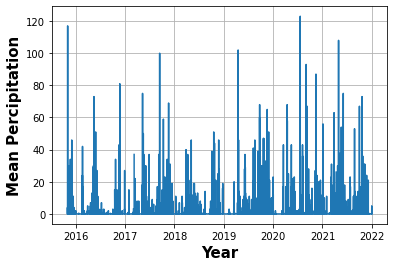

In [ ]:
import matplotlib.pyplot as plt

ax = plt.axes()
plt.xlabel("Year",fontsize="15",fontweight="bold")
plt.ylabel("Mean Percipitation",fontsize="15",fontweight="bold")
plt.grid(True)
plt.plot(df)
plt.show()

In [ ]:
df = df.dropna()

In [ ]:
null=df[df.isnull().any(axis=1)]
print("Null values:",null.shape[0])

Null values: 0


In [ ]:
daily_mean=df.groupby(df.index.day).mean()
monthly_mean=df.groupby(df.index.month).mean()
hourly_mean=df.groupby(df.index.hour).mean()
yearly_mean=df.groupby(df.index.year).mean()

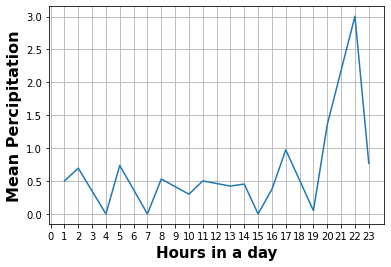

In [ ]:
ax=plt.axes()
plt.plot(hourly_mean)
plt.grid(True)
plt.xticks(range(0,24))
plt.xlabel("Hours in a day",fontsize=15,fontweight="bold")
plt.ylabel("Mean Percipitation",fontsize=16,fontweight="bold")
plt.show()

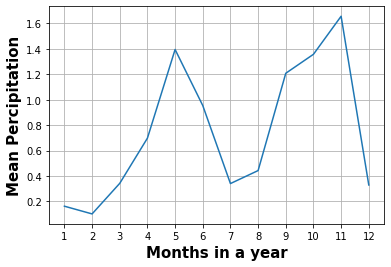

In [ ]:
ax=plt.axes()
plt.plot(monthly_mean)
plt.grid(True)
plt.xticks(range(1,13))
plt.xlabel("Months in a year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Percipitation",fontsize=15,fontweight="bold")
plt.show()

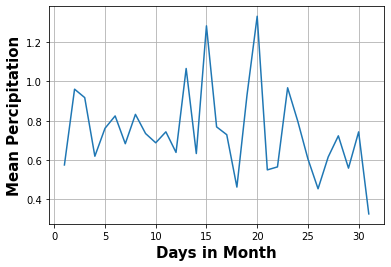

In [ ]:
ax=plt.axes()
plt.plot(daily_mean)
plt.grid(True)
plt.xlabel("Days in Month",fontsize=15,fontweight="bold")
plt.ylabel("Mean Percipitation",fontsize=15,fontweight="bold")
plt.show()

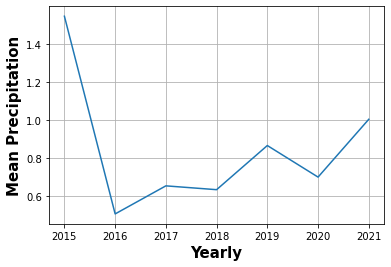

In [ ]:
ax=plt.axes()
plt.plot(yearly_mean)
plt.grid(True)
plt.xlabel("Yearly",fontsize=15,fontweight="bold")
plt.ylabel("Mean Precipitation",fontsize=15,fontweight="bold")
plt.show()

In [ ]:
daily=df.resample("D").mean()
print("Sample reduced by {} rows after resampling".format(df.shape[0]-daily.shape[0]))

Sample reduced by 14127 rows after resampling


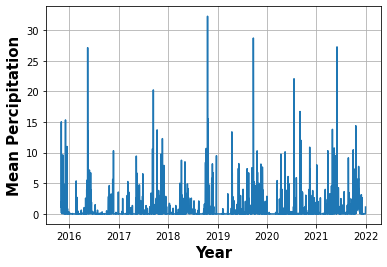

In [ ]:
ax=plt.axes()
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Percipitation",fontsize=15,fontweight="bold")
plt.grid(True)
plt.plot(daily)
plt.show()

In [ ]:
daily=daily["2016-01-01":"2022-01-01"]
daily.shape

(2192, 1)

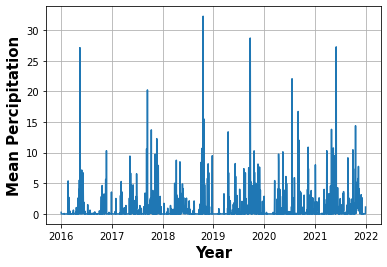

In [ ]:
ax=plt.axes()
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Percipitation",fontsize=15,fontweight="bold")
plt.grid(True)
plt.plot(daily)
plt.show()

In [ ]:
print("Null values before:",daily.isnull().sum())

daily=daily.fillna(method="ffill")

print("Null values After:",daily.isnull().sum())

Null values before: Precipitation(millimeters)    9
dtype: int64
Null values After: Precipitation(millimeters)    0
dtype: int64


In [ ]:
actual=daily['Precipitation(millimeters)'].to_frame().rename(columns={ 'Precipitation(millimeters)':"actual"})
predicted=daily['Precipitation(millimeters)'].to_frame().shift(1).rename(columns={ 'Precipitation(millimeters)':"predicted"})

df_daily=pd.concat([actual,predicted],axis=1)

In [ ]:
df_daily.head()

,actual,predicted
Time,,
2016-01-01,0.25625,NaN
2016-01-02,0.00625,0.25625
2016-01-03,0.00000,0.00625
2016-01-04,0.00000,0.00000
2016-01-05,0.00000,0.00000


In [ ]:
df_daily=df_daily[1:]

In [ ]:
from sklearn.metrics import mean_squared_error

rmse=mean_squared_error(df_daily["actual"],df_daily["predicted"],squared=False)
print("RMSE: {:.1f}".format(rmse))

RMSE: 2.9


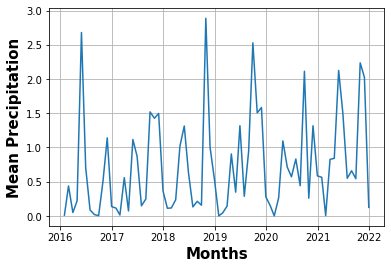

In [ ]:
monthly=daily.resample("M").mean()
ax=plt.axes()
plt.plot(monthly)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Precipitation",fontsize=15,fontweight="bold")
plt.grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


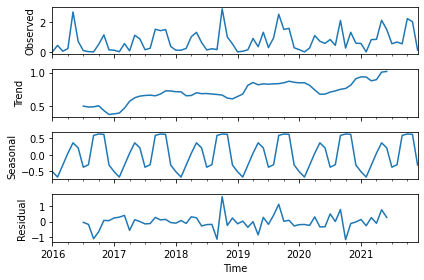

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(monthly)
result.plot()
plt.show()

In [ ]:
monthly

,Precipitation(millimeters)
Time,
2016-01-31,0.010887
2016-02-29,0.437469
2016-03-31,0.049350
2016-04-30,0.219306
2016-05-31,2.679359
...,...
2021-08-31,0.659386
2021-09-30,0.543929
2021-10-31,2.235916


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def check_adfuller(data):
    result=adfuller(data)
    
    print("ADF statistics:{}".format(result[0]))
    print("p-value:{}".format(result[1]))
    print("lags used:{}".format(result[2]))
    print("No of observation:{}".format(result[3]))
    print()
    print("Critical Values:")
    for key,value in result[4].items():
        print("Critical({}):{}".format(key,value))  

In [ ]:
check_adfuller(monthly)

ValueError: ignored

In [ ]:
monthly["Seasonal Diff"]=daily['Precipitation(millimeters)']-daily['Precipitation(millimeters)'].shift(12)

In [ ]:
check_adfuller(monthly["Seasonal Diff"].dropna())

ADF statistics:-8.222869750637727
p-value:6.360012009800259e-13
lags used:0
No of observation:71

Critical Values:
Critical(1%):-3.526004646825607
Critical(5%):-2.9032002348069774
Critical(10%):-2.5889948363419957


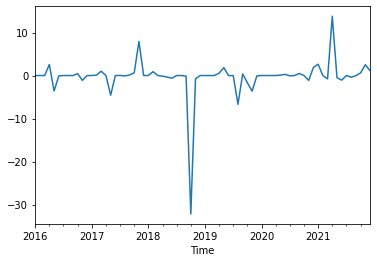

In [ ]:
monthly["Seasonal Diff"].plot()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

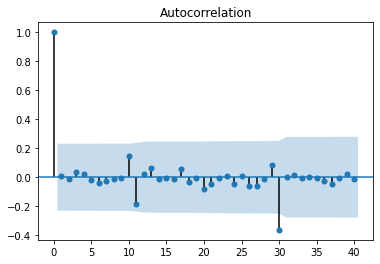

In [ ]:
plot_acf(monthly["Seasonal Diff"].dropna(),lags=40)
plt.show()

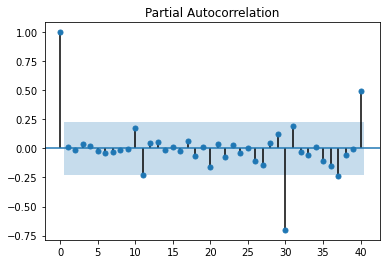

In [ ]:
plot_pacf(monthly["Seasonal Diff"].dropna(),lags=40)
plt.show()

In [ ]:
train=monthly['Precipitation(millimeters)'][:"2021-01-01"].to_frame()
test=monthly['Precipitation(millimeters)']["2021-01-01":].to_frame()

train.shape,test.shape

((60, 1), (12, 1))

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
import itertools
p=d=q=range(0,2)

pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [ ]:
for pdq_params in pdq:
    for seasonal_params in seasonal_pdq:
        try:
            model=SARIMAX(train,
                          order=pdq_params,
                          seasonal_order=seasonal_params
                         )
            result=model.fit()
            print("SARIMAX({}x{}12)-AIC:{}".format(pdq_params,
                                                   seasonal_params,
                                                   result.aic
                                                  ))
            
        except:
            continue

SARIMAX((0, 0, 0)x(0, 0, 0, 12)12)-AIC:168.29291796475823
SARIMAX((0, 0, 0)x(0, 0, 1, 12)12)-AIC:149.2966756519267
SARIMAX((0, 0, 0)x(0, 1, 0, 12)12)-AIC:106.59686986433954


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX((0, 0, 0)x(0, 1, 1, 12)12)-AIC:102.10862500310733
SARIMAX((0, 0, 0)x(1, 0, 0, 12)12)-AIC:133.19226336530443
SARIMAX((0, 0, 0)x(1, 0, 1, 12)12)-AIC:132.57991110004997
SARIMAX((0, 0, 0)x(1, 1, 0, 12)12)-AIC:101.79137764003957


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX((0, 0, 0)x(1, 1, 1, 12)12)-AIC:102.23760220336729
SARIMAX((0, 0, 1)x(0, 0, 0, 12)12)-AIC:155.8072955012159
SARIMAX((0, 0, 1)x(0, 0, 1, 12)12)-AIC:145.5714787654217
SARIMAX((0, 0, 1)x(0, 1, 0, 12)12)-AIC:107.64857922513096
SARIMAX((0, 0, 1)x(0, 1, 1, 12)12)-AIC:103.28301210353965
SARIMAX((0, 0, 1)x(1, 0, 0, 12)12)-AIC:135.01655535618292
SARIMAX((0, 0, 1)x(1, 0, 1, 12)12)-AIC:134.49716002552174
SARIMAX((0, 0, 1)x(1, 1, 0, 12)12)-AIC:102.55095237726589


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX((0, 0, 1)x(1, 1, 1, 12)12)-AIC:101.66784790915331
SARIMAX((0, 1, 0)x(0, 0, 0, 12)12)-AIC:157.4934966316218
SARIMAX((0, 1, 0)x(0, 0, 1, 12)12)-AIC:156.94323035355018
SARIMAX((0, 1, 0)x(0, 1, 0, 12)12)-AIC:144.75675559102825
SARIMAX((0, 1, 0)x(0, 1, 1, 12)12)-AIC:139.94463638241723
SARIMAX((0, 1, 0)x(1, 0, 0, 12)12)-AIC:156.83447395822517
SARIMAX((0, 1, 0)x(1, 0, 1, 12)12)-AIC:158.83405763718451
SARIMAX((0, 1, 0)x(1, 1, 0, 12)12)-AIC:140.82718110349074
SARIMAX((0, 1, 0)x(1, 1, 1, 12)12)-AIC:141.913070178028
SARIMAX((0, 1, 1)x(0, 0, 0, 12)12)-AIC:133.0620455419586
SARIMAX((0, 1, 1)x(0, 0, 1, 12)12)-AIC:126.60480661694825
SARIMAX((0, 1, 1)x(0, 1, 0, 12)12)-AIC:111.06146130426937
SARIMAX((0, 1, 1)x(0, 1, 1, 12)12)-AIC:107.02939313364128
SARIMAX((0, 1, 1)x(1, 0, 0, 12)12)-AIC:122.44187611328756
SARIMAX((0, 1, 1)x(1, 0, 1, 12)12)-AIC:123.48982399888175
SARIMAX((0, 1, 1)x(1, 1, 0, 12)12)-AIC:106.63038376778017


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX((0, 1, 1)x(1, 1, 1, 12)12)-AIC:107.05168325558351
SARIMAX((1, 0, 0)x(0, 0, 0, 12)12)-AIC:147.14976298212235
SARIMAX((1, 0, 0)x(0, 0, 1, 12)12)-AIC:141.8296027434159
SARIMAX((1, 0, 0)x(0, 1, 0, 12)12)-AIC:107.4173409411933
SARIMAX((1, 0, 0)x(0, 1, 1, 12)12)-AIC:103.10807414843501
SARIMAX((1, 0, 0)x(1, 0, 0, 12)12)-AIC:134.88664124673448
SARIMAX((1, 0, 0)x(1, 0, 1, 12)12)-AIC:134.44676993552474
SARIMAX((1, 0, 0)x(1, 1, 0, 12)12)-AIC:102.28760015185334
SARIMAX((1, 0, 0)x(1, 1, 1, 12)12)-AIC:101.23031455769569
SARIMAX((1, 0, 1)x(0, 0, 0, 12)12)-AIC:137.10969374120205
SARIMAX((1, 0, 1)x(0, 0, 1, 12)12)-AIC:130.61713948063039
SARIMAX((1, 0, 1)x(0, 1, 0, 12)12)-AIC:109.19242649608984
SARIMAX((1, 0, 1)x(0, 1, 1, 12)12)-AIC:104.89492986831415


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX((1, 0, 1)x(1, 0, 0, 12)12)-AIC:126.43216792982425


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX((1, 0, 1)x(1, 0, 1, 12)12)-AIC:127.48831164059844
SARIMAX((1, 0, 1)x(1, 1, 0, 12)12)-AIC:104.01397788133386


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX((1, 0, 1)x(1, 1, 1, 12)12)-AIC:103.04654286977672
SARIMAX((1, 1, 0)x(0, 0, 0, 12)12)-AIC:150.5386974429749
SARIMAX((1, 1, 0)x(0, 0, 1, 12)12)-AIC:145.73511408743255
SARIMAX((1, 1, 0)x(0, 1, 0, 12)12)-AIC:123.97954098864616
SARIMAX((1, 1, 0)x(0, 1, 1, 12)12)-AIC:120.13642697434182
SARIMAX((1, 1, 0)x(1, 0, 0, 12)12)-AIC:142.11780681744753
SARIMAX((1, 1, 0)x(1, 0, 1, 12)12)-AIC:143.19927848555972
SARIMAX((1, 1, 0)x(1, 1, 0, 12)12)-AIC:119.82031646569908


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX((1, 1, 0)x(1, 1, 1, 12)12)-AIC:120.89890238670904
SARIMAX((1, 1, 1)x(0, 0, 0, 12)12)-AIC:133.36965584977594
SARIMAX((1, 1, 1)x(0, 0, 1, 12)12)-AIC:128.2286575292126
SARIMAX((1, 1, 1)x(0, 1, 0, 12)12)-AIC:112.11266990249575
SARIMAX((1, 1, 1)x(0, 1, 1, 12)12)-AIC:108.11370379859633
SARIMAX((1, 1, 1)x(1, 0, 0, 12)12)-AIC:124.42866787417293
SARIMAX((1, 1, 1)x(1, 0, 1, 12)12)-AIC:125.43294171621903
SARIMAX((1, 1, 1)x(1, 1, 0, 12)12)-AIC:107.26356336622747
SARIMAX((1, 1, 1)x(1, 1, 1, 12)12)-AIC:106.35357235017084


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
#SARIMAX((1, 0, 0)x(1, 1, 1, 12)12)-AIC:101.23031455769569
model=SARIMAX(train,
              order=(1, 0, 0),
              seasonal_order=(1, 1, 1, 12)
             ).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:         Precipitation(millimeters)   No. Observations:                   60
Model:             SARIMAX(1, 0, 0)x(1, 1, 1, 12)   Log Likelihood                 -46.615
Date:                            Sat, 14 May 2022   AIC                            101.230
Time:                                    15:29:58   BIC                            108.715
Sample:                                01-31-2016   HQIC                           104.059
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2481      0.165     -1.508      0.132      -0.571       0.074
ar.S.L12      -0.9996      0.227     -4.395      0.000      -1.445      -0.554
ma.S.L12       0.9759      7.045      0.139      0.890     -12.833      14.784
sigma2         0.2938      2.018      0.146      0.884      -3.661       4.248
===================================================================================
Ljung-Box (Q):                       24.79   Jarque-Bera (JB):                 4.61
Prob(Q):                              0.97   Prob(JB):                         0.10
Heteroskedasticity (H):               1.19   Skew:                             0.24
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

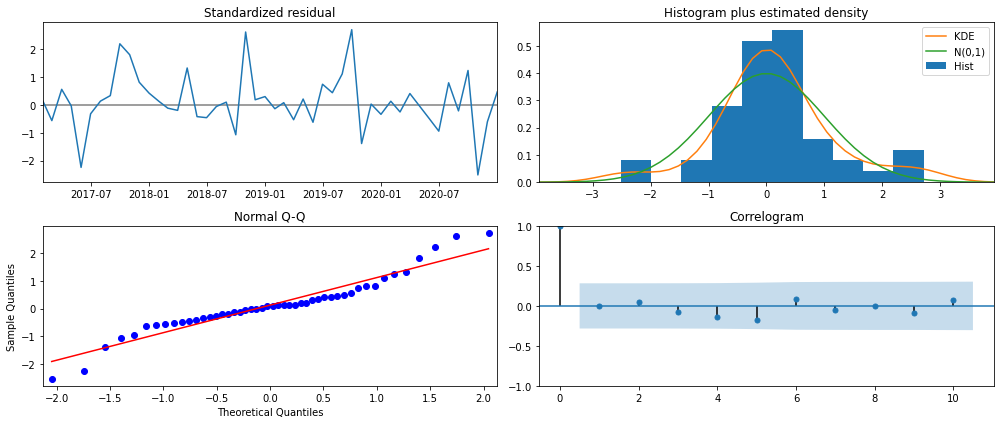

In [ ]:
model.plot_diagnostics(figsize=(14,6))
plt.tight_layout()
plt.show()

In [ ]:
predict=model.get_prediction(start=len(train),
                             end=(len(train)+len(test)-1)
                            )

In [ ]:
predict_values=predict.predicted_mean
bounds=predict.conf_int()
bounds.head()

,lower Precipitation(millimeters),upper Precipitation(millimeters)
2021-01-31,-1.089129,1.203202
2021-02-28,-1.268188,1.091226
2021-03-31,-0.804317,1.559165
2021-04-30,-0.348474,2.015258
2021-05-31,-1.051242,1.312506


In [ ]:
lower_lim=bounds["lower Precipitation(millimeters)"]
upper_lim=bounds["upper Precipitation(millimeters)"]

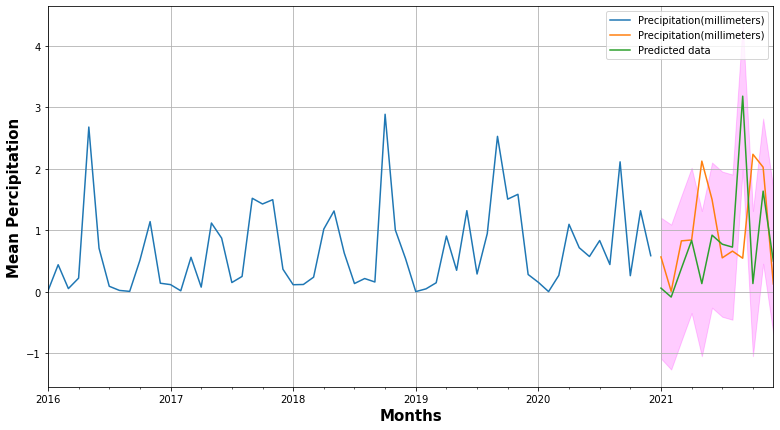

In [ ]:
ax=train.plot(label="Training Data",figsize=(13,7))
test.plot(label="Testing Data",ax=ax)
predict_values.plot(label="Predicted data",ax=ax)
ax.fill_between(bounds.index,lower_lim,upper_lim,color="magenta",alpha=0.2)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Percipitation",fontsize=15,fontweight="bold")
plt.grid(True)
plt.legend(loc="best")
plt.show()

In [ ]:
rmse=mean_squared_error(test["Precipitation(millimeters)"].values,predict_values,squared=False)
rmse

1.1730496926242386

In [ ]:
test.tail()

,Precipitation(millimeters)
Time,
2021-08-31,0.659386
2021-09-30,0.543929
2021-10-31,2.235916
2021-11-30,2.025764
2021-12-31,0.125086


In [ ]:
dates_to_predict=pd.date_range(start="2022-01-02",end="2023-01-01",freq="M")
len(dates_to_predict)

12

In [ ]:
new_predict=model.get_prediction(start=len(monthly),
                                 end=(len(monthly)+len(dates_to_predict)-1)
                                )

In [ ]:
new_predict_values=new_predict.predicted_mean

In [ ]:
new_bounds=new_predict.conf_int()
new_lower_lim=new_bounds["lower Precipitation(millimeters)"]
new_upper_lim=new_bounds["upper Precipitation(millimeters)"]

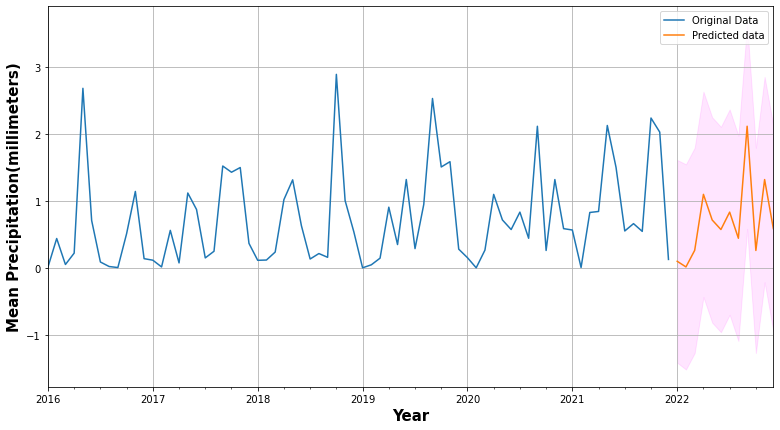

In [ ]:
ax=monthly["Precipitation(millimeters)"].plot(label="Original Data",figsize=(13,7))
new_predict_values.plot(label="Predicted data",ax=ax)
ax.fill_between(new_bounds.index,new_lower_lim,new_upper_lim,color="magenta",alpha=0.1)

plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Precipitation(millimeters)",fontsize=15,fontweight="bold")
plt.grid(True)
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
train_scale=scaler.fit_transform(train)
test_scale=scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
time_step=12
generator=TimeseriesGenerator(data=train_scale,
                              targets=train_scale,
                              length=time_step,
                              batch_size=1
                             )

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(200,activation="relu",input_shape=(time_step,1),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(164,activation="relu"))
model.add(Dropout(0.01))


model.add(Dense(62))

model.add(Dense(22))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="mean_squared_error",
              metrics=["mse"]
             )

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 12, 200)           161600    
                                                                 
 dropout_18 (Dropout)        (None, 12, 200)           0         
                                                                 
 lstm_23 (LSTM)              (None, 164)               239440    
                                                                 
 dropout_19 (Dropout)        (None, 164)               0         
                                                                 
 dense_14 (Dense)            (None, 62)                10230     
                                                                 
 dense_15 (Dense)            (None, 22)                1386      
                                                                 
 dense_16 (Dense)            (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping(monitor="loss",patience=50)

In [ ]:
model.fit(generator,epochs=160,steps_per_epoch=40,verbose=False,callbacks=[callback])

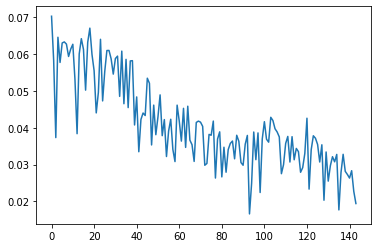

In [ ]:
loss_per_epoch=model.history.history["loss"]
plt.plot(loss_per_epoch)
plt.show()

In [ ]:
import numpy as np
test_pred=[]

test_batch=train_scale[-time_step:]
current_batch=test_batch.reshape(1,time_step,1)

for i in range(len(test)):
    pred=model.predict(current_batch)[0]
    test_pred.append(pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[pred]],axis=1)

In [ ]:
true_pred=scaler.inverse_transform(test_pred)

In [ ]:
test["pred"]=true_pred

In [ ]:
test

,Precipitation(millimeters),pred
Time,,
2021-01-31,0.564545,0.245736
2021-02-28,0.004687,0.120173
2021-03-31,0.826187,0.412860
2021-04-30,0.841098,0.788120
2021-05-31,2.124702,0.631790
2021-06-30,1.499511,0.589498
2021-07-31,0.549654,0.689325
2021-08-31,0.659386,0.795139
2021-09-30,0.543929,1.132894


In [ ]:
from sklearn.metrics import mean_squared_error

rmse=mean_squared_error(test["Precipitation(millimeters)"],true_pred,squared=False)
rmse

0.6537687879238451

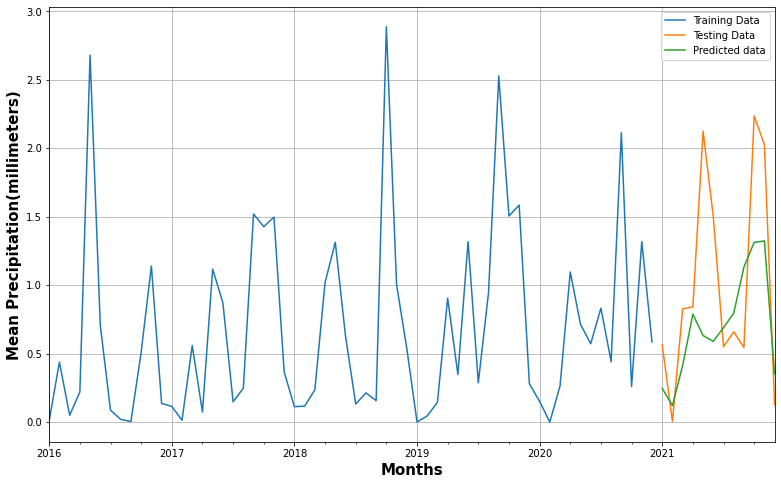

In [ ]:
ax=train["Precipitation(millimeters)"].plot(label="Training Data",figsize=(13,8))
test["Precipitation(millimeters)"].plot(label="Testing Data")
test["pred"].plot(label="Predicted data",ax=ax)
plt.grid(True)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Precipitation(millimeters)",fontsize=15,fontweight="bold")
plt.legend(loc="best")
plt.show()